In [1]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Classification and decision boundaries
In this exercise you will be experimenting with linear classification, including visualization of decision boundaries. Noteably, the parameters of the decision boundary will not be learned with least squares but instead adjusted manually (or randomly). 


In [5]:
import numpy as np  # numeriacal computing
import matplotlib.pyplot as plt  # plotting core
import seaborn as sns  # higher level plotting tools

## Linear Decision boundary
### Generating data points
In the following section you will be experimenting with a standard linear classifier, eg. $\mathbf{y} = \text{sign}(\mathbf{w}^\top\mathbf{x})$, where $\mathbf{w}$ is the model parameters.
The cell below generates random data to be used for classification. 


In [6]:
np.random.seed(42)  ## generate the same sequence of random points
# Generate 2 clusters of data, by drawing from a normal distribution.
S = np.eye(2)  ## covariance matrix, set to indenty matrix i.e. x,y independent. 
p_pos = np.random.multivariate_normal([1, 1], S, 40)
p_neg = np.random.multivariate_normal([-1, -1], S, 40)
## 40 points (x,y) coordinates
p_pos.shape

(40, 2)

The data of the positive and negative classes are stored in the variables `p_pos`
 and `p_neg`
, respectively


The next cell visualizes the two classes. 


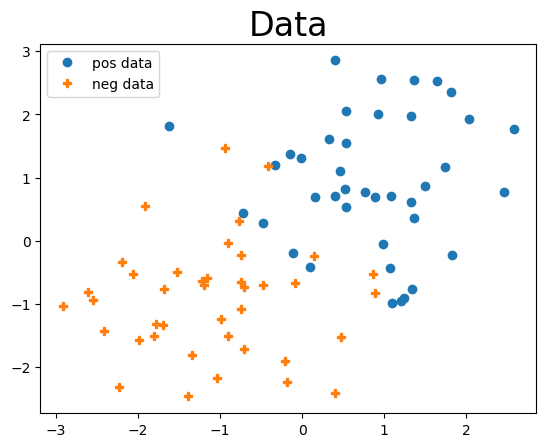

In [7]:
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
plt.title("Data", fontsize=24)
plt.legend();

In the following section, you will manually experiment with changing the model parameters of a linear decision boundary and visualize the results.

---
**Task 1 (easy): Linear decision boundary👩‍💻**
1. Implement the function `linear_boundary`
 that, given an x-coordinate and the model parameters, returns the y-value according to the formula


$y = w_1 x + w_0$

2. Use the function `linear_boundary`
 to generate the points of the decision boundary with `xb`
 (following $y = w_1 x + w_0$ ). The decision boundary is specified by your choice of model parameters.

3. Which choice of model parameters seems (visually) to best separate the two classes? 



---

In [8]:
def linear_boundary(x, w):
    """
    :param x: x values of the line.
    :param w: List of model parameters [bias, slope] of the line.
    
    :return: y-values of the boundary / line .
    """

    return w[1]*x+w[0]

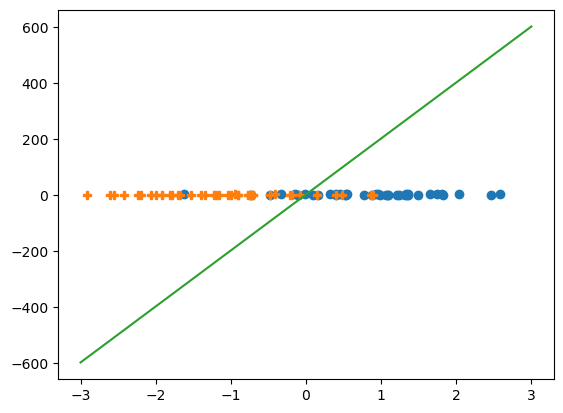

In [41]:
# plotting the data points and decision boundary
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
xb = np.linspace(-3, 3, 100)
# Write solutions here

line = []
w = np.array([1, 200])
for i, v in np.ndenumerate(xb):
    y = linear_boundary(v, w)
    line.append(np.array([v, y]))

line = np.array(line)
ax.plot(line[:,0], line[:,1], label="boundary")


The prediction function predicts the class of the data points based on the y-value of the data point compared to the y-values of the decision boundary.


---
**Task 2 (easy): Prediction function👩‍💻**
1. Implement the function `predict`
 that predicts the `class`
 of a point (whether the points belong to the `neg`
 or `pos`
 class) using the `linear_boundary`
 function.

2. Implement the function `accuracy`
 that compares the _predicted class_ to the _actual class_ of given data points. The function should return the fraction of $\frac{\#Correct}{\#All Points}$.

3. Which parameter values provide the largest fraction of correct predictions?

4. Is a linear decision boundary a good model to separate the two groups of data? 



---


In [44]:
def predict(w, p):
    """
    :param w: parameters of your decision function.
    :param p: The data points to predict.
    
    :return: 0 if `neg` class / 1 if `pos` class.
    """

    results = []

    for x in p:
        v = np.dot(w.T, x)
        res = np.sign(v)

        if res < 0:
            results.append(0)
        else:
            results.append(1)
    
    return np.array(results)


def accuracy(predictions,targets):
    """
    :param predictions: 1D-array of predicted classes for the data.
    :param targets: 1D-array of actual classes for the data.
     
    :return: fraction of correctly predicted points (num_correct/num_points).
    """
    correct = 0
    for idx, p in np.ndenumerate(predictions):
        if p == targets[idx] :
            correct = correct + 1
    
    return correct/targets.size

        


In [45]:
# print accuracy 
prediction_pos = predict(w, p_pos)
prediction_neg = predict(w, p_neg)
predictions = []
targets = []

for i, pred in np.ndenumerate(prediction_pos):
    predictions.append(pred)
    targets.append(1)

for i, pred in np.ndenumerate(prediction_neg):
    predictions.append(pred)
    targets.append(0)

predictions = np.array(predictions)
targets = np.array(targets)

acc = accuracy(predictions, targets)
print("Accuracy of decision line: ", acc)

# write reflection

Accuracy of decision line:  0.8375



---
**Task 3 (medium): Random Search Optimization👩‍💻**
The goal of this exercise is to implement the function `random_optimization`
 that utilizes randomly chosen model parameters to search for the linear decision boundary in the binary dataset.
1. Implement the function `random_optimization`
:
    - In the function template, initialize best_params (remember it is a list) and best_score with the value zero.
    - Create the targets for the data (1s for `p_pos`
 and 0s for `p_neg`
)
    - Run `num_iterations`
 iterations and use `np.random.randn()`
 to generate new random parameters during each iteration.
    - Predict the classes of the data using the function `predict`
.
    - Evaluate the performance of the random parameters with the `accuracy`
 function.
    - Compare the accuracy achievied with the current parameters to the best parameters and update the best choice accordingly.
    - Return the best parameters and their accuracy.


2. Find the best parameters, by executing `random_optimization`
. Pass the necessary `decision_function`
 and `accuracy`
, along with the dataset and set `num_iterations`
 to 50.

3. Visualize Decision Boundary:
    - Set up a visualization using Matplotlib, plotting your 2-class dataset points.
    - Plot the optimal decision boundary based on the parameters found.


4. Analysis:
    - Based on the results, determine if a linear decision boundary is suitable for your dataset.
    - Discuss the efficiency of random search in optimizing the decision boundary and its limitations.




---

[0.70745771 0.77693169] 0.9125


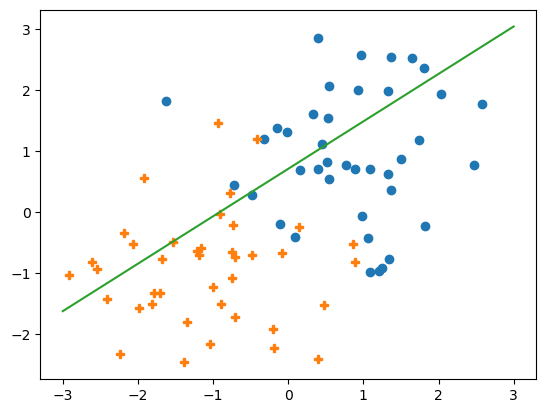

In [49]:
def random_optimization(data, num_iterations=1000):
    """
    Performs a random search optimization to find the best decision boundary for a 2-class dataset.
    :param data: The dataset, structured as [positive examples, negative examples].
    :param num_iterations: Number of random configurations to test.

    :return: The best parameters found and their score.
    """
    best_params = []
    best_score = 0

    for i in range(0, 1000):
        w = np.random.randn(2)
        prediction_pos = predict(w, data[0]) # Positive 
        prediction_neg = predict(w, data[1]) # Negative
        predictions = []
        targets = []

        for i, pred in np.ndenumerate(prediction_pos):
            predictions.append(pred)
            targets.append(1)

        for i, pred in np.ndenumerate(prediction_neg):
            predictions.append(pred)
            targets.append(0)
        
        predictions = np.array(predictions)
        targets = np.array(targets)

        acc = accuracy(predictions, targets)

        if acc > best_score:
            best_score = acc
            best_params = w
    
    return best_params, best_score


best_params, best_score = random_optimization([p_pos,p_neg], num_iterations=50)
print(best_params, best_score)

# Task 3: plot the results ...
fig, ax = plt.subplots()
ax.plot(p_pos[:, 0], p_pos[:, 1], "o", label='pos data')
ax.plot(p_neg[:, 0], p_neg[:, 1], "P", label='neg data')
xb = np.linspace(-3, 3, 100)
line = []
for i, v in np.ndenumerate(xb):
    y = linear_boundary(v, best_params)
    line.append(np.array([v, y]))

line = np.array(line)
ax.plot(line[:,0], line[:,1], label="boundary")

## Non-linear decision boundary
The following section experiments with a different dataset (see visualization in the cell below), where a straight line cannot seperate the different classes in the data. 


In [52]:
### Data generation
q1 = np.random.multivariate_normal([0, 0], [[.5, 0], [0, .5]], 400)

t = np.linspace(0, 2 * np.pi, 400)  ##  
q2 = np.array([(3 + q1[:, 0]) * np.sin(t), (3 + q1[:, 1]) * np.cos(t)]).T

The data of the two classes (`class 1`
 and `class 2`
) are stored in the variables `q1`
 and `q2`
, respectively.


The following cell visualize the dataset of the two classes. `class 1`
 is labelled with 0s and `class 2`
 with 1s.


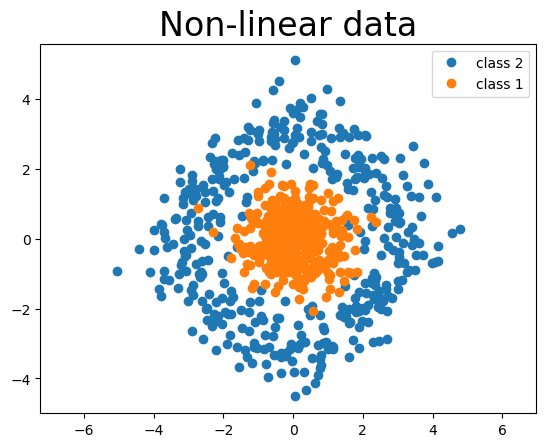

In [53]:
fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "o", label='class 1')

plt.title("Non-linear data", fontsize=24)
ax.axis('equal')
plt.legend()
plt.show()


---
**Task 4 (easy): Non-linear data👩‍💻**
1. What is the best accuracy you can achieve if you attempt to predict the class of the data with a straight line? (Use your implementation from [Task 1](#linear) )

2. Instead of a straight line, use the parametric equation of a circle ([described in detail here](https://mathopenref.com/coordparamcircle.html)
):

$$ 
    x = r\sin(t)\\
    y = r\cos(t)
    $$
to create the function `circle_boundary`
 that, given `t`
 (array of angles) and the radius `r`
 as input, returns the $x$- and $y$-coordinates of the circle.

**Tip**
Use the already provided `t`
 to plot a circular boundary.




---

Linear accuracy:  0.52875


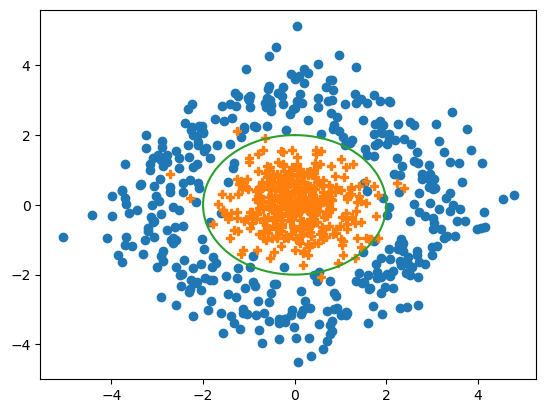

In [59]:
import math

t = np.linspace(0, 2 * np.pi, 400)  ### create 400 points in the range 0 ->2*pi (angles in radian units) 

best_p, best_s = random_optimization([q1,q2], 50)
print("Linear accuracy: ", best_s)

def circle_boundary(t, radius):
    """
    :param t: angle data points of the circle. 
    :param radius: radius of the circle
    :return: (x-values,y-values) of the circle points .
    """
    x = radius*np.sin(t)
    y = radius*np.cos(t)

    return (x,y)

circle = []
radius = 2

for v in t:
    x,y = circle_boundary(v, radius)
    circle.append(np.array([x, y]))

circle = np.array(circle)

fig, ax = plt.subplots()
ax.plot(q2[:, 0], q2[:, 1], "o", label='class 2')
ax.plot(q1[:, 0], q1[:, 1], "P", label='class 1')

# Plotting the circle

ax.plot(circle[:,0], circle[:,1], label='circle')



---
**Task 5 (easy): Predict non-linear data👩‍💻💡**
1. Which choice of radius seems (visually) to best separate the two classes?
2. Could the decision boundary from above be learned by a linear model? 


**Tip**
A Linear model in machine learning refers to being linear in the parameters. 

3. Modify the `predict`
 function from [Task 2](#predict) to return the estimated class of the datapoint using a circlular decision boundary (simply the radius).
4. Use the function `accuracy`
 to get the fraction of correctly predicted data points.


**Tip**
Separating the classes can be done if your predict based on whether $x^2+y^2$ is $>r^2$ or $<r^2$


---

1. The radius 2 seems to be the visually best
2. I would say yes. If the parameters is what is being referenced as a linear model then the current model is linear

In [64]:
def estimate(w, points):

    res = []

    for point in points:
        x = point[0]
        y = point[1]

        p = x**2+y**2
        if p < w**2:
            res.append(1)
        else:
            res.append(0)
    
    return np.array(res)

def predict_circle(radius, data):
    """
    :param radius: radius of the circular decision boudary.
    :param data: List containing the two classes of data points.
    
    :return: fraction of correctly predicted points (num_correct/num_points).
    """

    d_pos, d_neg = data
    prediction_pos = estimate(radius, d_pos) # Positive 
    prediction_neg = estimate(radius, d_neg) # Negative
    predictions = []
    targets = []

    for i, pred in np.ndenumerate(prediction_pos):
        predictions.append(pred)
        targets.append(1)

    for i, pred in np.ndenumerate(prediction_neg):
        predictions.append(pred)
        targets.append(0)
    
    predictions = np.array(predictions)
    targets = np.array(targets)

    acc = accuracy(predictions, targets)

    return acc

print("Circular accuracy: ", predict_circle(radius, [q1,q2]))
    


Circular accuracy:  0.97625
